<a href="https://colab.research.google.com/github/mohamed-ssafini/default_of_credit_card/blob/main/Bias_Variance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The Motivation for Regularization: the Bias-Variance Trade-off**

In [1]:
import numpy as np #numerical computation
import pandas as pd #data wrangling
import matplotlib.pyplot as plt #plotting package
#Next line helps with rendering plots
%matplotlib inline
import matplotlib as mpl #add'l plotting functionality
import seaborn as sns #a fancy plotting package
mpl.rcParams['figure.dpi'] = 400 #high res figures

Generate quadratic data with random noise to illustrate this.

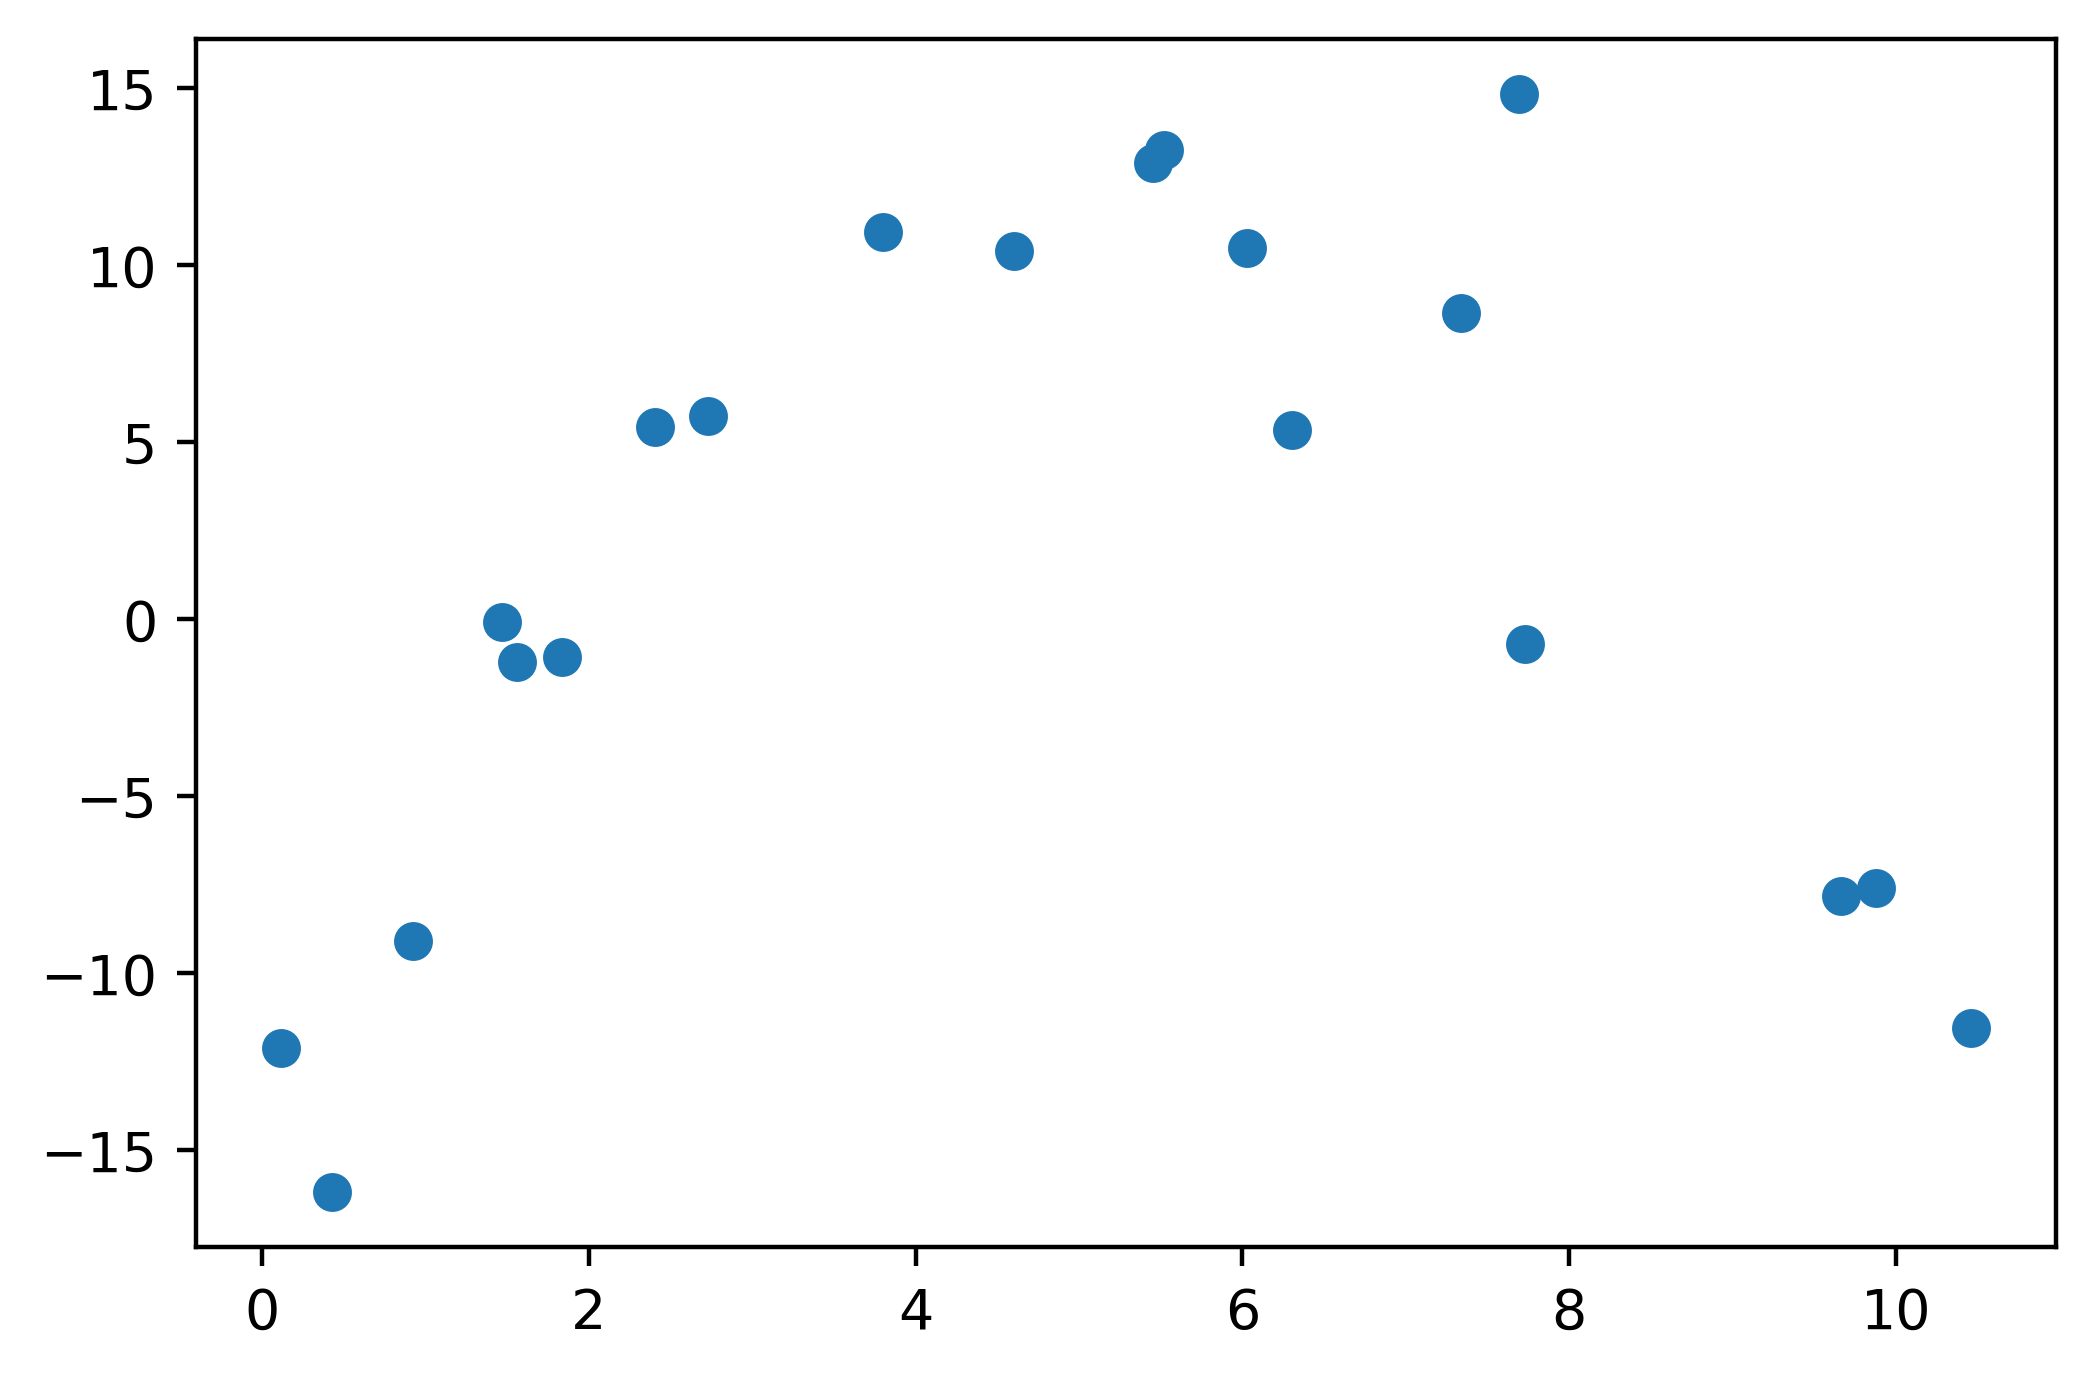

In [2]:
np.random.seed(seed=9)
n_points = 20
X = np.random.uniform(0, 11, n_points)
X = np.sort(X)
Y = (-X+2) * (X-9) + np.random.normal(0, 3, n_points)
plt.scatter(X, Y)

In [3]:
lin_fit = np.polyfit(X, Y, 1)

Function to take in the polynomial coefficients and produce the y values

In [4]:
def poly_fun(X, p):
    Y = np.zeros_like(X)
    power = len(p)-1
    for coefficient in p:
        Y = Y + coefficient*X**power
        power = power - 1
    return Y

In [5]:
lin_fit

array([ 0.44464616, -0.61869372])

In [6]:
poly_fun(X,lin_fit)

array([-0.56795261, -0.42917123, -0.2075489 ,  0.03588094,  0.07638692,
        0.19702737,  0.45030033,  0.59479584,  1.07117738,  1.42827491,
        1.80618691,  1.83602902,  2.06083994,  2.18273629,  2.64318106,
        2.8007159 ,  2.81695454,  3.67843349,  3.77355591,  4.03257388])

In [7]:
curve_x = np.linspace(0,11,333)

In [8]:
cmap = mpl.cm.get_cmap('tab10')

(-20.0, 20.0)

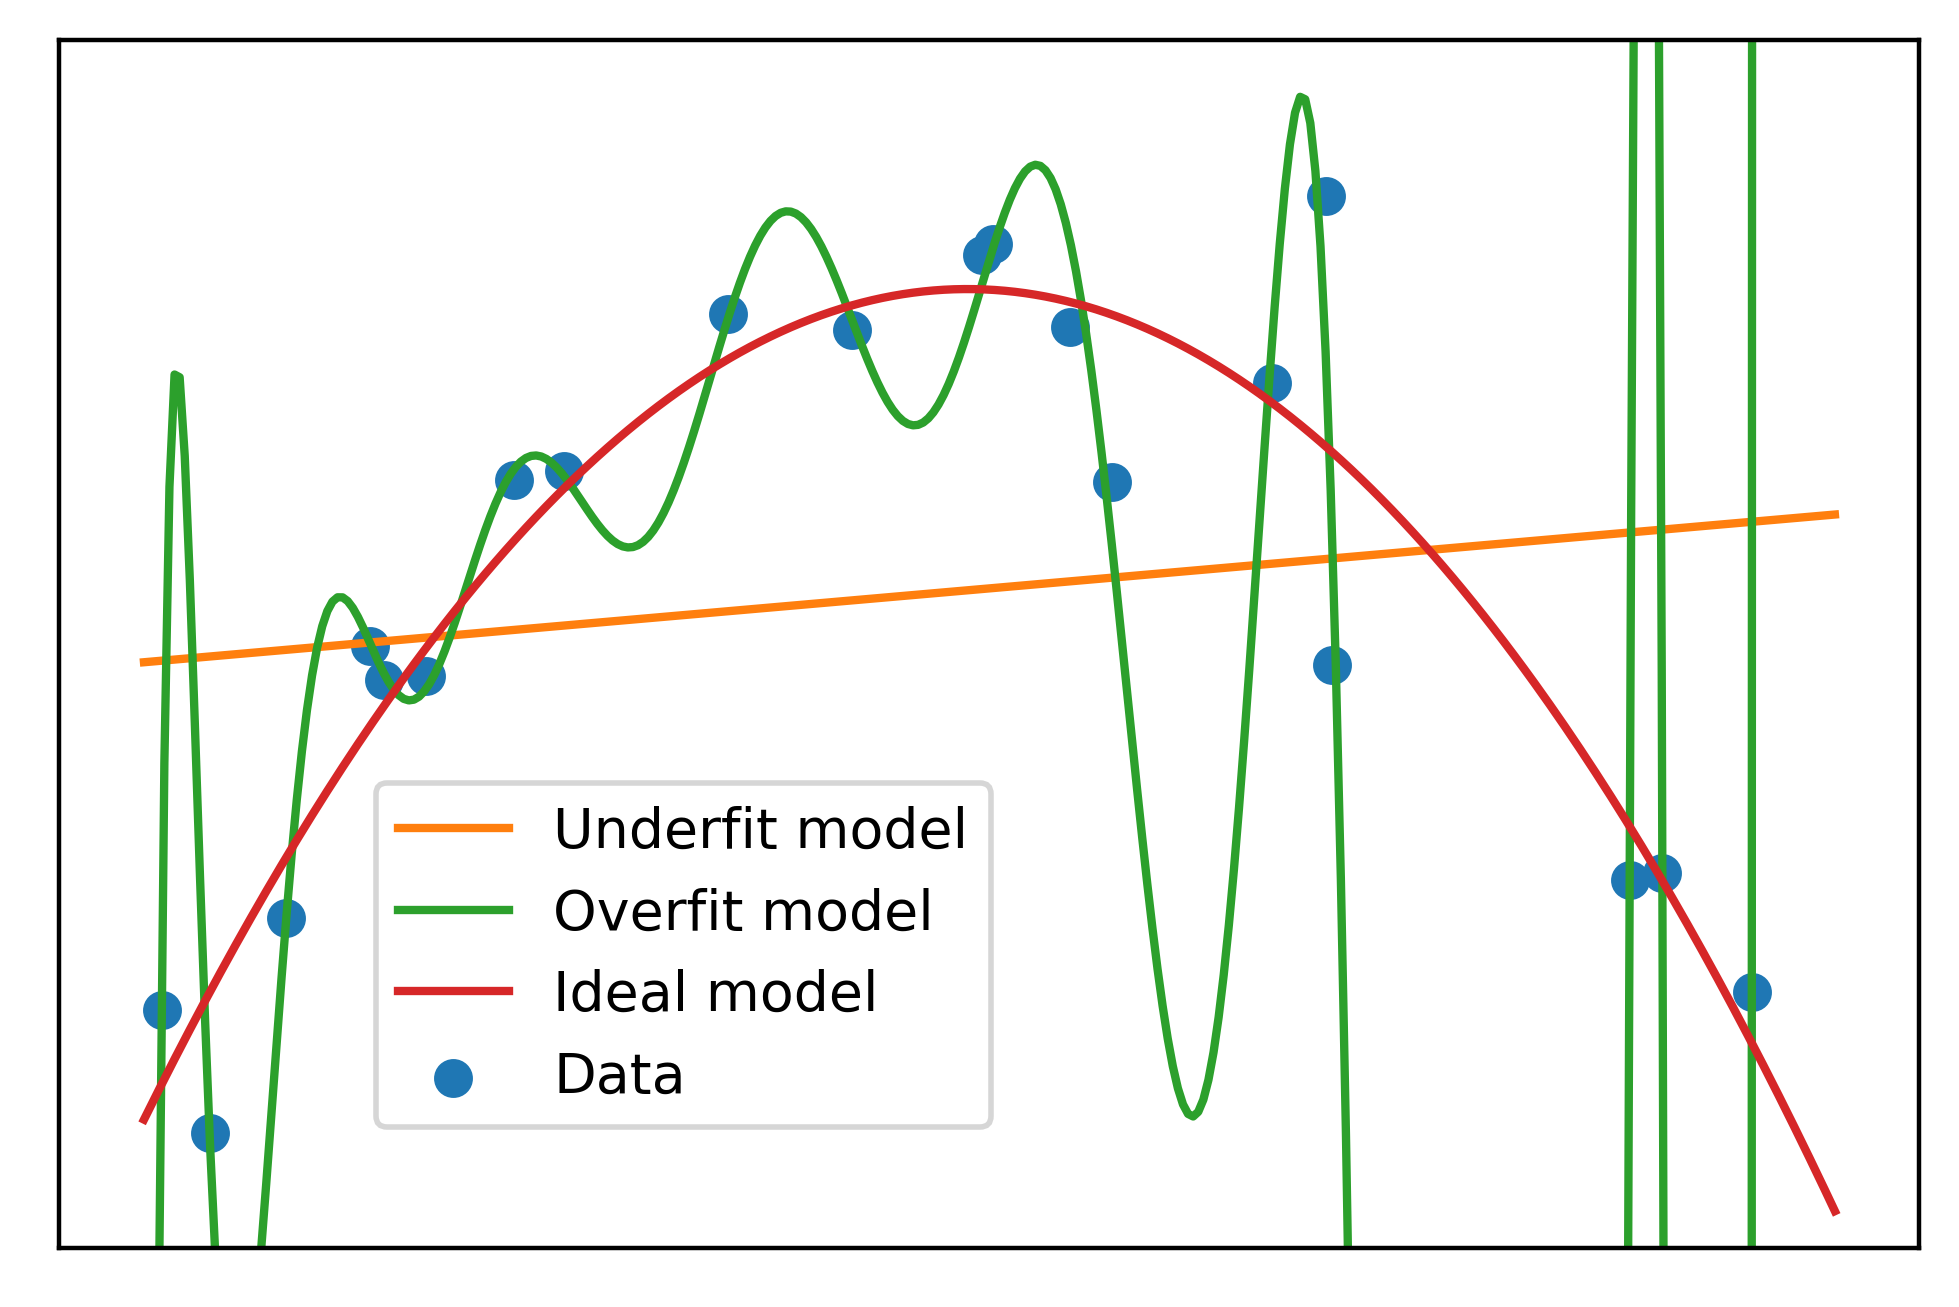

In [9]:
plt.scatter(X, Y, label='Data', color=cmap(0))
plt.plot(curve_x, poly_fun(curve_x,lin_fit), label='Underfit model', color=cmap(1))
plt.plot(curve_x, poly_fun(curve_x,np.polyfit(X, Y, 15)), label='Overfit model', color=cmap(2))
plt.plot(curve_x, poly_fun(curve_x,np.polyfit(X, Y, 2)), label='Ideal model', color=cmap(3))
plt.legend(loc=[0.17, 0.1])
plt.xticks([])
plt.yticks([])
plt.ylim([-20, 20])

Generating and Modeling Synthetic Classification Data

In [10]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [11]:
X_synthetic, y_synthetic = make_classification(
    n_samples=1000, n_features=200,
    n_informative=3, n_redundant=10,
    n_repeated=0, n_classes=2,
    n_clusters_per_class=2,
    weights=None, flip_y=0.01,
    class_sep=0.8, hypercube=True,
    shift=0.0, scale=1.0,
    shuffle=True, random_state=24)

In [12]:
print(X_synthetic.shape, y_synthetic.shape)
print(np.mean(y_synthetic))

(1000, 200) (1000,)
0.501


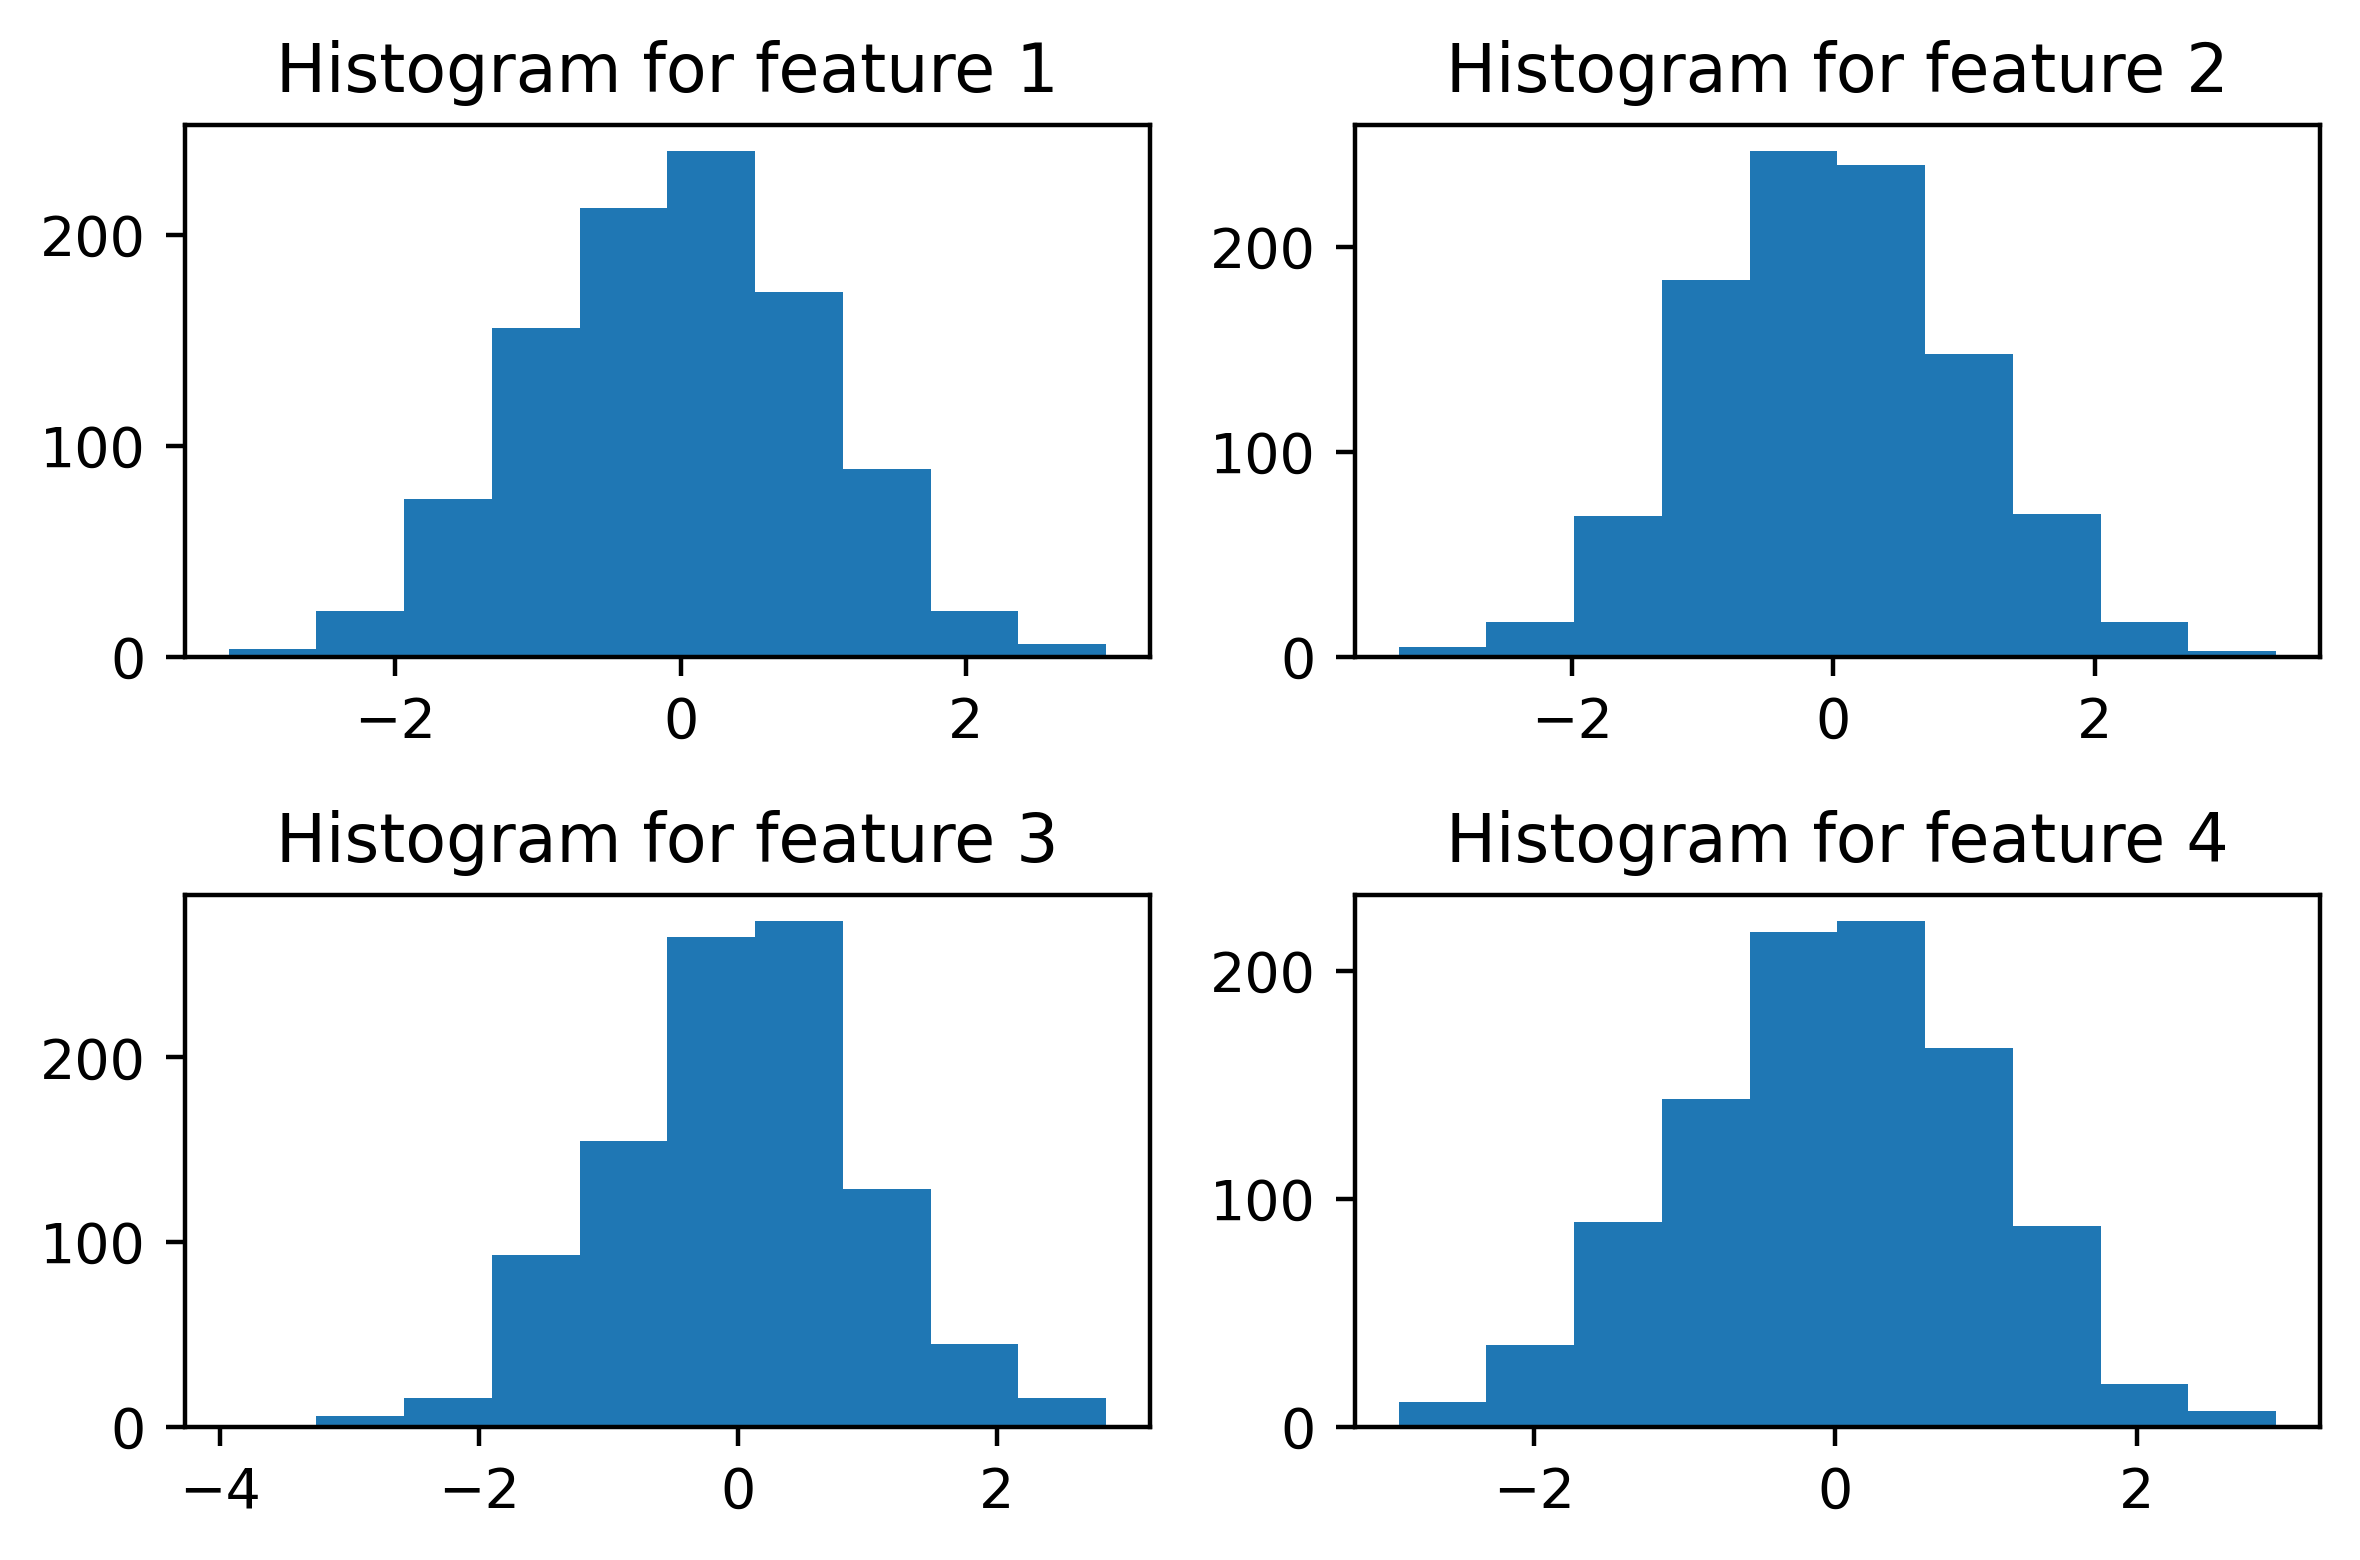

In [13]:
for plot_index in range(4):
    plt.subplot(2, 2, plot_index+1)
    plt.hist(X_synthetic[:, plot_index])
    plt.title('Histogram for feature {}'.format(plot_index+1))
plt.tight_layout()

In [14]:
X_syn_train, X_syn_test, y_syn_train, y_syn_test = train_test_split(
    X_synthetic, y_synthetic,
    test_size=0.2, random_state=24)

In [15]:
lr_syn = LogisticRegression(solver='liblinear', penalty='l1', C=1000, random_state=1)

In [16]:
lr_syn.fit(X_syn_train, y_syn_train)

LogisticRegression(C=1000, penalty='l1', random_state=1, solver='liblinear')

In [17]:
y_syn_train_predict_proba = lr_syn.predict_proba(X_syn_train)

In [18]:
roc_auc_score(y_syn_train, y_syn_train_predict_proba[:,1])

0.9420000000000001

In [19]:
y_syn_test_predict_proba = lr_syn.predict_proba(X_syn_test)

In [20]:
roc_auc_score(y_syn_test, y_syn_test_predict_proba[:,1])

0.8075807580758075